In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def delta(t, t_sp):
    if t in t_sp:
        return 1
    else:
        return 0

def recover_state(x_t, u_t, t_d, t_f, U, dt, t):
    dx = (1 - x_t) / t_d - u_t * x_t * delta(t, t_sp) *(1/dt)
    du = (U - u_t) / t_f + U * (1 - u_t) * delta(t,t_sp) * (1/dt)
    
    x_t_ = x_t + dx * dt
    u_t_ = u_t + du * dt
    
    return x_t_, u_t_

In [53]:
x = 1.
u = 0.2

#mili second
t_d = 200
t_f = 1500

U = 0.2

dt = 0.01

T = 500 * (1/dt)
intT = int(T)

time = np.zeros(intT)

x_t = np.zeros(intT)
u_t = np.zeros(intT)
t_sp_forplot = np.zeros(intT)


x_t[0] = x
u_t[0] = u

t_sp = [10,30,50,70,90,110,130,150,170,190,210,400]

for i in range(intT - 1):
    time[i+1] = i * dt
    x_t[i+1], u_t[i+1] = recover_state(x_t[i], u_t[i], t_d, t_f, U, dt, i * dt)
    if delta(i*dt, t_sp):
        t_sp_forplot[i] = 0.01

[1.         1.         1.         ... 0.46100116 0.46102811 0.46105506]
[0.2        0.2        0.2        ... 0.81348535 0.81348126 0.81347717]


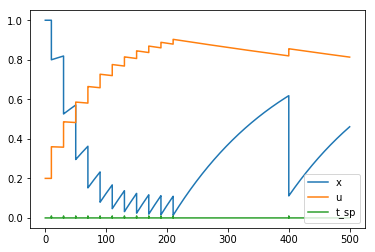

In [58]:
print(x_t)
print(u_t)
plt.plot(time, x_t, label="x")
plt.plot(time, u_t, label="u")
plt.plot(time, t_sp_forplot, label = "t_sp")
plt.legend(loc="lower right")